# Emerging Technologies

### Main Assignment 

#### John Shields - G00348336

Jupyter notebook that trains a model using a Data Set from a Power Production.

# Training the model
***

In [71]:
# necessary imports
# neural networks
import tensorflow.keras as krs
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model
# numerical arrays
import numpy as np
# make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)
# data frames
import pandas as pd
# plotting
import matplotlib.pyplot as plt

# plot style
plt.style.use("ggplot")
# plot size
plt.rcParams['figure.figsize'] = [14, 8]

In [72]:
# load dataset csv file
windTurbine_dataSet = pd.read_csv("https://tinyurl.com/y8s579fs")

In [73]:
# turn dataset into dataframe
wtDataSet = pd.DataFrame(windTurbine_dataSet)

# output dataFrame sample
wtDataSet.sample()

speed   power
334  16.967  95.593

### Train Model: Attempt 1

In [74]:
# train  model
model = krs.models.Sequential()
model.add(krs.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(krs.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
# compile model
model.compile(krs.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [75]:
# fit the data
model.fit(wtDataSet['speed'], wtDataSet['power'], epochs=500, batch_size=10)

Epoch 1/500
50/50 [==============================] - 1s 592us/step - loss: 3866.9622
Epoch 2/500
50/50 [==============================] - 0s 612us/step - loss: 3961.2749
Epoch 3/500
50/50 [==============================] - 0s 592us/step - loss: 3518.8718
Epoch 4/500
50/50 [==============================] - 0s 571us/step - loss: 3273.9145
Epoch 5/500
50/50 [==============================] - 0s 571us/step - loss: 2955.2904
Epoch 6/500
50/50 [==============================] - 0s 571us/step - loss: 2806.7767
Epoch 7/500
50/50 [==============================] - 0s 857us/step - loss: 2918.9478

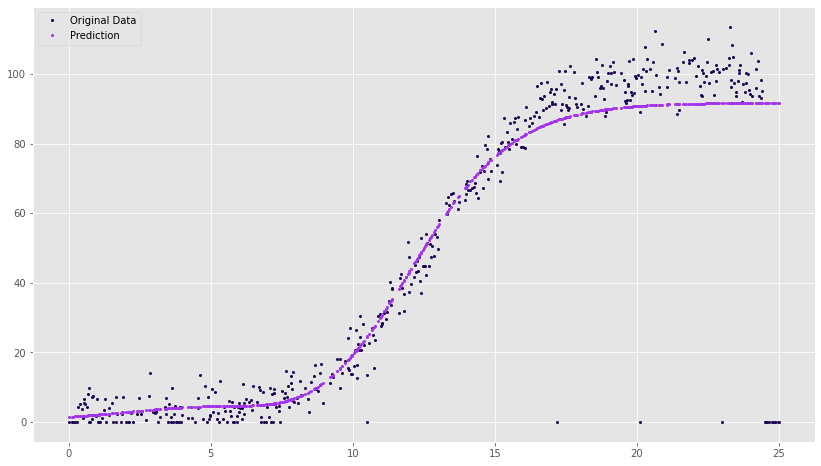

In [76]:
# plot the values
plt.plot(wtDataSet['speed'], wtDataSet['power'], 'o', color="#1b0554", markersize=2, label='Original Data')
plt.plot(wtDataSet['speed'], model.predict(wtDataSet['speed']), 'o', color="#a434eb", markersize=2, label='Prediction')
plt.legend();

In [77]:
# save prediction result to a .h5 file
model.save("model_predictions\mp.h5")
print("Saved model prediction to directory")

Saved model prediction to directory


### Train Model: Attempt 2

In [78]:
# dataset as numpy arrays
x = wtDataSet.iloc[:,0].values
y = wtDataSet.iloc[:,1].values

xArray = np.array(x)
yArray = np.array(y)

In [79]:
# build model using layers
krsInput = krs.Input(shape=(1,))
layer1 = Dense(10, activation='relu')(krsInput)
layer2 = Dense(50, activation='relu')(layer1)
layer3 = Dense(50, activation='relu')(layer2)
output = Dense(1)(layer3)

In [80]:
# compile model
model2 = Model(inputs=krsInput, outputs=[output])
model2.compile(optimizer='adam', loss=['mean_squared_error'])

In [ ]:
# stop early to save cpu space
# early_stopping_monitor = EarlyStopping(patience=2)
#  callbacks=[early_stopping_monitor]

# fit data arrays
model2.fit(xArray, yArray, epochs=30000, batch_size=1000)
model2.predict([1.001])

Epoch 1/30000
1/1 [==============================] - 1s 522ms/step - loss: 3804.7534
Epoch 2/30000
1/1 [==============================] - 0s 3ms/step - loss: 3761.3564
Epoch 3/30000
1/1 [==============================] - 0s 4ms/step - loss: 3718.4216
Epoch 4/30000
1/1 [==============================] - 0s 5ms/step - loss: 3675.4712
Epoch 5/30000
1/1 [==============================] - 0s 3ms/step - loss: 3632.4932
Epoch 6/30000
1/1 [==============================] - 0s 2ms/step - loss: 3589.5852
Epoch 7/30000
1/1 [==============================] - 0s 3ms/step - loss: 3546.9282

array([[2.014]], dtype=float32)

In [1]:
# plot the values
plt.plot(wtDataSet['speed'], wtDataSet['power'], 'o', color="#1b0554", markersize=3, label='Original Data')
plt.plot(wtDataSet['speed'], model2.predict(wtDataSet['speed']), 'o', color="#a434eb", markersize=3, label='Prediction')
plt.legend();

NameError: name 'plt' is not defined

In [ ]:
model2.save("model_predictions\mp2.h5")
print("Saved model prediction to directory")

### References

[Introduction to Keras for Engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/)

[Keras Explained](https://web.microsoftstream.com/video/bf7aaf56-d65f-47fb-aec9-e0c2af49534a?referrer=https:%2F%2Flearnonline.gmit.ie%2F)

[How to do Model](https://web.microsoftstream.com/video/8ceee222-ebdf-4234-b05b-9090155f1747)

[Simple MNIST convnet](https://keras.io/examples/vision/mnist_convnet/)

[Load CSV data](https://www.tensorflow.org/tutorials/load_data/csv)

[How to Save and Load Your Keras Deep Learning Model](https://machinelearningmastery.com/save-load-keras-deep-learning-models/)

[Keras Losses](https://keras.io/api/losses/)

<h3 align="center">END OF NOTEBOOK</h3>